# Earthquakes Vizualization

https://www.kaggle.com/usgs/earthquake-database

I am doing simple earthquake visualization and trying Cartopy. 

In [1]:
import pandas as pd
dataset = pd.read_csv('database.csv')
dataset.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [2]:
dataset['Date'] =  pd.to_datetime(dataset['Date'], utc=True)
dataset['day'] = dataset['Date'].dt.day
dataset['month'] = dataset['Date'].dt.month
dataset['year'] = dataset['Date'].dt.year
dataset.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,day,month,year
23407,2016-12-28 00:00:00+00:00,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,28,12,2016
23408,2016-12-28 00:00:00+00:00,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,28,12,2016
23409,2016-12-28 00:00:00+00:00,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,4.8,1.5200,US10007NAF,US,US,US,Reviewed,28,12,2016
23410,2016-12-29 00:00:00+00:00,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,6.0,1.4300,US10007NL0,US,US,US,Reviewed,29,12,2016
23411,2016-12-30 00:00:00+00:00,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,4.5,0.9100,US10007NTD,US,US,US,Reviewed,30,12,2016


In [3]:
dataset_clean = dataset.drop(['Magnitude Seismic Stations','Horizontal Distance','Horizontal Error','Depth Error','Magnitude Error', 'Depth Seismic Stations','Azimuthal Gap','Root Mean Square','ID','Status', 'Location Source','Magnitude Source'],axis =1)
dataset2016 = dataset_clean.where(dataset_clean['year'] == 2016).dropna()

dataset2016.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Source,day,month,year
22943,2016-01-01 00:00:00+00:00,02:00:40,-50.5575,139.4489,Earthquake,10.00,6.3,MWW,US,1.0,1.0,2016.0
22944,2016-01-01 00:00:00+00:00,15:02:17,-28.6278,-177.2810,Earthquake,34.00,5.8,MWW,US,1.0,1.0,2016.0
22945,2016-01-02 00:00:00+00:00,04:22:20,44.8069,129.9406,Earthquake,585.47,5.8,MWW,US,2.0,1.0,2016.0
22946,2016-01-03 00:00:00+00:00,23:05:22,24.8036,93.6505,Earthquake,55.00,6.7,MWW,US,3.0,1.0,2016.0
22947,2016-01-05 00:00:00+00:00,02:21:11,30.6132,132.7337,Earthquake,4.71,5.8,MWW,US,5.0,1.0,2016.0


Ok, now that I dropped the NaN values and kept the value for 2016, I would like to visualize the earthquakes this year. I should have a preview of the tectonic plate boundaries, where most of the earthquakes usually occur.

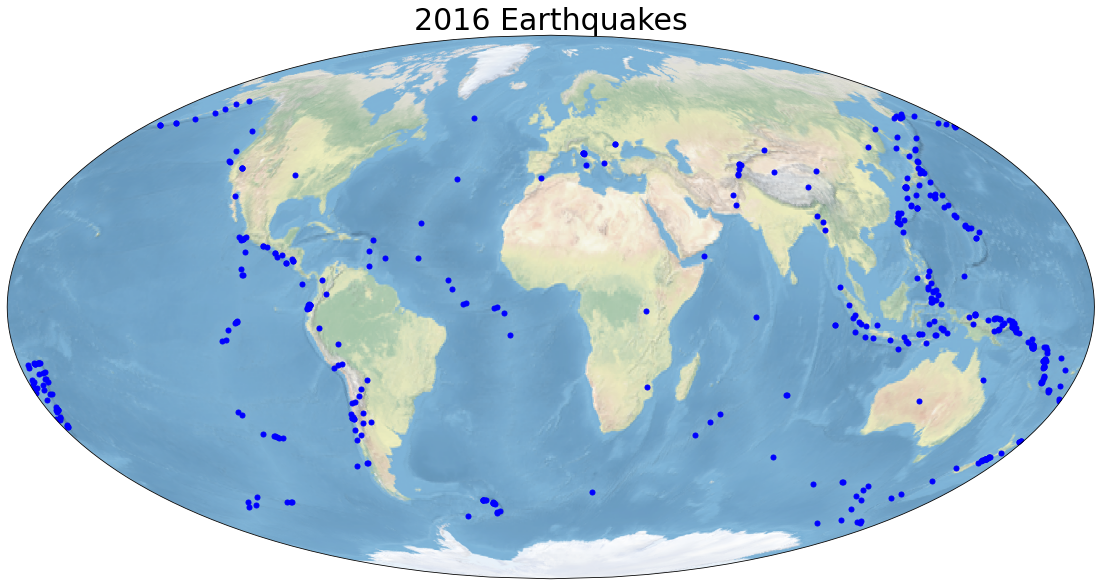

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()



plt.plot(dataset2016['Longitude'], dataset2016['Latitude'],
         color='blue', linewidth=2, marker='.',ls ='',ms=10,
         transform=ccrs.Geodetic(),
         )


plt.title('2016 Earthquakes',fontsize=30)


plt.show()

In [5]:
dataset_bombs = dataset_clean.where(dataset_clean['Type'] == 'Nuclear Explosion').dropna()
dataset_bombs.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Source,day,month,year
565,1966-12-20 00:00:00+00:00,15:30:01,37.302167,-116.408333,Nuclear Explosion,1.2,5.62,ML,CI,20.0,12.0,1966.0
897,1968-04-26 00:00:00+00:00,15:00:02,37.295333,-116.455667,Nuclear Explosion,1.2,5.63,ML,CI,26.0,4.0,1968.0
1129,1968-12-19 00:00:00+00:00,16:30:01,37.231500,-116.473667,Nuclear Explosion,1.4,5.52,ML,CI,19.0,12.0,1968.0
1380,1969-09-16 00:00:00+00:00,14:30:01,37.314167,-116.460667,Nuclear Explosion,1.2,5.82,ML,CI,16.0,9.0,1969.0
1532,1970-03-26 00:00:00+00:00,19:00:01,37.300500,-116.534167,Nuclear Explosion,1.2,5.54,ML,CI,26.0,3.0,1970.0


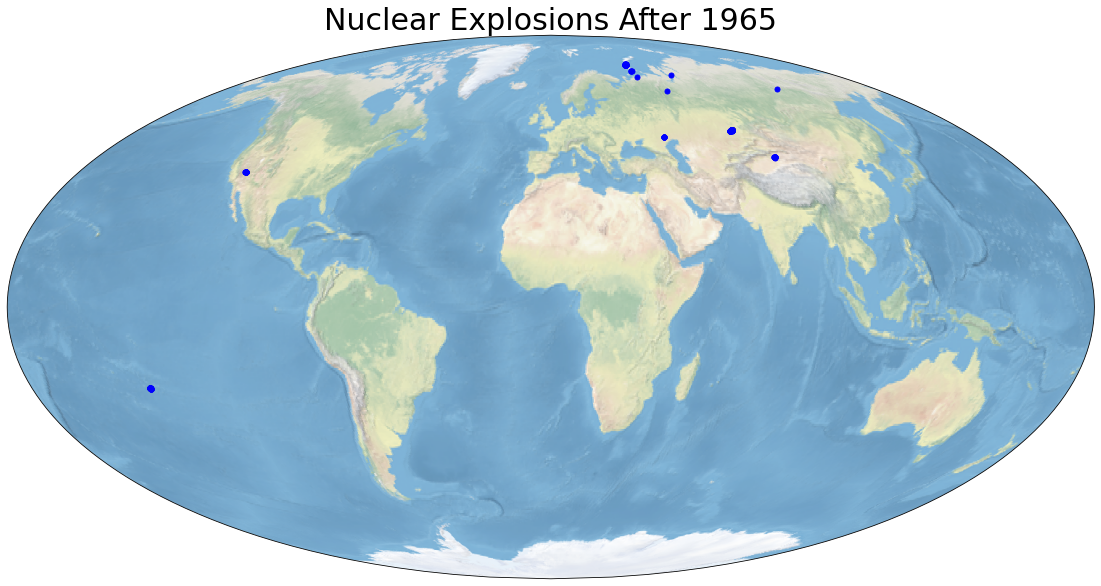

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()



plt.plot(dataset_bombs['Longitude'], dataset_bombs['Latitude'],
         color='blue', linewidth=2, marker='.',ls ='',ms=10,
         transform=ccrs.Geodetic(),
         )


plt.title('Nuclear Explosions After 1965',fontsize=30)


plt.show()